# Music Analysis

Import Pandas, Seaborn, Matplotlib

In [687]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

## 1. Combine all of the CSV files into a single dataset using Pandas. It should be held in a variable called "all_top_songs".

### Strategy
- Import all 10 csv files
- Concatenate them into a single csv file
- Reset the index
- Use a loop to avoid repetition

In [688]:
all_top_songs = pd.concat([pd.read_csv(f"data/{year}.csv") for year in range(2010, 2020)], ignore_index=True)

## 2. Clean the dataset to make sure the following columns are either integer or floats and not objects:
- id
- year
- bpm
- nrgy
- dnce
- db
- live
- val
- dur
- acous
- spch
- pop

In [689]:
all_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


Note: Use Pandas, Matplotlib, and/or Seaborn to answer the questions below.

## 3. What is the most popular song in the dataset?

### Strategy:

- Sort 'all_top_songs' by the 'pop' column 
- Order the results descending
- Select position 0 for the most popular

In [690]:
# Calculation
most_popular = all_top_songs.sort_values(by='pop', ascending=False).iloc[0]

# Answer
print(f"Answer:\nThe most popular song in the data set is {most_popular['title']} by {most_popular['artist']}.")

Answer:
The most popular song in the data set is Memories by Maroon 5.


## 4. What artist has the most songs in the dataset?

### Strategy:
- Calculate the count of songs per artist in descending order.
- Make a list identifying artist(s) with the most songs.
- Determine the number of songs for the top artist(s)
- Check for ties.


In [691]:
# Calculation
artist_counts = all_top_songs['artist'].value_counts()
top_artists = artist_counts.head(1).index.tolist()

# Answer
if len(top_artists) > 1:
    print(f"Answer:\nThe artists with the most songs are: {', '.join(top_artists)}.")
else:
    print(f"Answer:\nThe artist with the most songs is {top_artists[0]}.")

Answer:
The artist with the most songs is Katy Perry.


## 5. What is the most popular genre of music in the dataset?

### Strategy:
- Calculate the count of songs per genre in descending order.
- Make a list identifying genre(s) with the most songs.
- Determine the number of songs for the top genre(s)
- Check for ties.


In [692]:
# Calculation
genre_counts = all_top_songs['top genre'].value_counts()
top_genre = genre_counts.head(1).index.tolist()

# Answer
if len(top_artists) > 1:
    print(f"Answer:\nThe most popular genres are: {', '.join(top_genre)}")
else:
    print(f"Answer:\nThe most popular genre is {top_genre[0]}.")

Answer:
The most popular genre is dance pop.


## 6. Are there any songs in the dataset more than once?

### Strategy
- Check for the count of all unique songs in the 'title' column.
- Check for duplicates.


In [693]:
# Calculation
song_counts = all_top_songs['title'].value_counts()
duplicates = song_counts[song_counts > 1]

# Answer
print(f"Answer:\n{len(duplicates)} songs appearing more than once:")
for title, count in duplicates.items():
    print(f"{title}: {count} appearances.")

Answer:
19 songs appearing more than once:
A Little Party Never Killed Nobody (All We Got): 2 appearances.
All I Ask: 2 appearances.
Kissing Strangers: 2 appearances.
Written in the Stars (feat. Eric Turner): 2 appearances.
The Hills: 2 appearances.
Love Yourself: 2 appearances.
We Are Never Ever Getting Back Together: 2 appearances.
Sugar: 2 appearances.
Say Something: 2 appearances.
First Time: 2 appearances.
Stitches: 2 appearances.
I Like It: 2 appearances.
Hello: 2 appearances.
Castle Walls (feat. Christina Aguilera): 2 appearances.
Company: 2 appearances.
Runnin' (Lose It All): 2 appearances.
Marry You: 2 appearances.
Just the Way You Are: 2 appearances.
Here: 2 appearances.


## 7. Is there a relationship between popularity and danceability?

### Strategy:
- Create a scatterplot.
- Use a regression line.
- Calculate the correlation coefficient.
- Show the plot and coefficient.

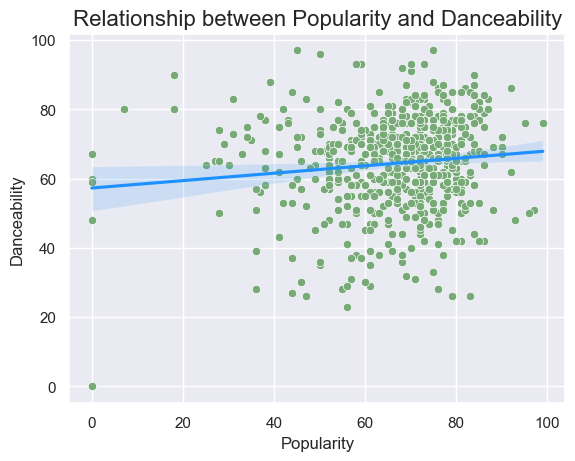

Answer:
Popularity and Danceability have a very weak positive linear correlation of 0.12.
This suggests that as one increases the other does slightly, but it is not strong 
enough to be a meaningful conclusion.


In [694]:
# Calculation
sns.scatterplot(x='pop', y='dnce', data=all_top_songs, color='#77AA77')
sns.regplot(x='pop', y='dnce', data=all_top_songs, color='#1E90FF', scatter=False)
correlation = all_top_songs['pop'].corr(all_top_songs['dnce'])

# Plot
plt.title("Relationship between Popularity and Danceability", fontsize=16)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Danceability', fontsize=12)
plt.show()

#Answer
print(f"Answer:\nPopularity and Danceability have a very weak positive linear correlation of {correlation:.2f}.")
print("This suggests that as one increases the other does slightly, but it is not strong \nenough to be a meaningful conclusion.")